In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### load data


In [5]:
df = pd.read_csv("../data/raw/complaints.csv")

C:\Users\bekuman\AppData\Local\Temp\ipykernel_16940\991127601.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


### Overview of the Data

In [50]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_word_count
0,6/20/2025,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,6/20/2025,In progress,Yes,NaN,14195687.0,NaN
1,6/20/2025,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,6/20/2025,Closed with explanation,Yes,NaN,14195688.0,NaN
2,6/20/2025,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,6/20/2025,In progress,Yes,NaN,14195689.0,NaN
3,6/20/2025,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,6/20/2025,In progress,Yes,NaN,14195690.0,NaN
4,6/20/2025,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,6/20/2025,In progress,Yes,NaN,14195692.0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Date received                 1048575 non-null  object 
 1   Product                       1048569 non-null  object 
 2   Sub-product                   1047549 non-null  object 
 3   Issue                         1048570 non-null  object 
 4   Sub-issue                     1027928 non-null  object 
 5   Consumer complaint narrative  159023 non-null   object 
 6   Company public response       299207 non-null   object 
 7   Company                       1048568 non-null  object 
 8   State                         1046577 non-null  object 
 9   ZIP code                      1048554 non-null  object 
 10  Tags                          29339 non-null    object 
 11  Consumer consent provided?    479972 non-null   object 
 12  Submitted via               

In [8]:
df.shape

(1048575, 18)

In [15]:
df.dtypes

Date received                    object
Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Date sent to company             object
Company response to consumer     object
Timely response?                 object
Consumer disputed?               object
Complaint ID                    float64
dtype: object

### Summary Statistics

In [16]:
# Summary for numerical columns
df.describe()

,Complaint ID
count,1.048566e+06
mean,1.305966e+07
std,1.135554e+06
min,9.780000e+02
25%,1.255846e+07
50%,1.332434e+07
75%,1.385714e+07
max,1.423259e+07


In [17]:
# Summary for categorical columns
df.describe(include='object')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
count,1048575,1048569,1047549,1048570,1027928,159023,299207,1048568,1046577,1048554,29339,479972,1048568,1048566,1048566,1048566,2377
unique,2146,21,79,157,261,94274,12,2375,62,17029,4,4,9,2125,8,2,2
top,6/4/2025,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,I have not supplied proof under the doctrine o...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,6/4/2025,In progress,Yes,No
freq,20485,934509,932021,537871,348718,2734,291541,321788,159142,13497,22162,310575,1041360,20464,468946,1044922,1579


### Check for missing values

In [11]:
df.isnull().sum().sort_values(ascending=False)

Consumer disputed?              1046198
Tags                            1019236
Consumer complaint narrative     889552
Company public response          749368
Consumer consent provided?       568603
Sub-issue                         20647
State                              1998
Sub-product                        1026
ZIP code                             21
Company response to consumer          9
Complaint ID                          9
Date sent to company                  9
Timely response?                      9
Company                               7
Submitted via                         7
Product                               6
Issue                                 5
Date received                         0
dtype: int64

C:\Users\bekuman\AppData\Local\Temp\ipykernel_16940\3535985575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=product_counts.index, x=product_counts.values, palette='mako')


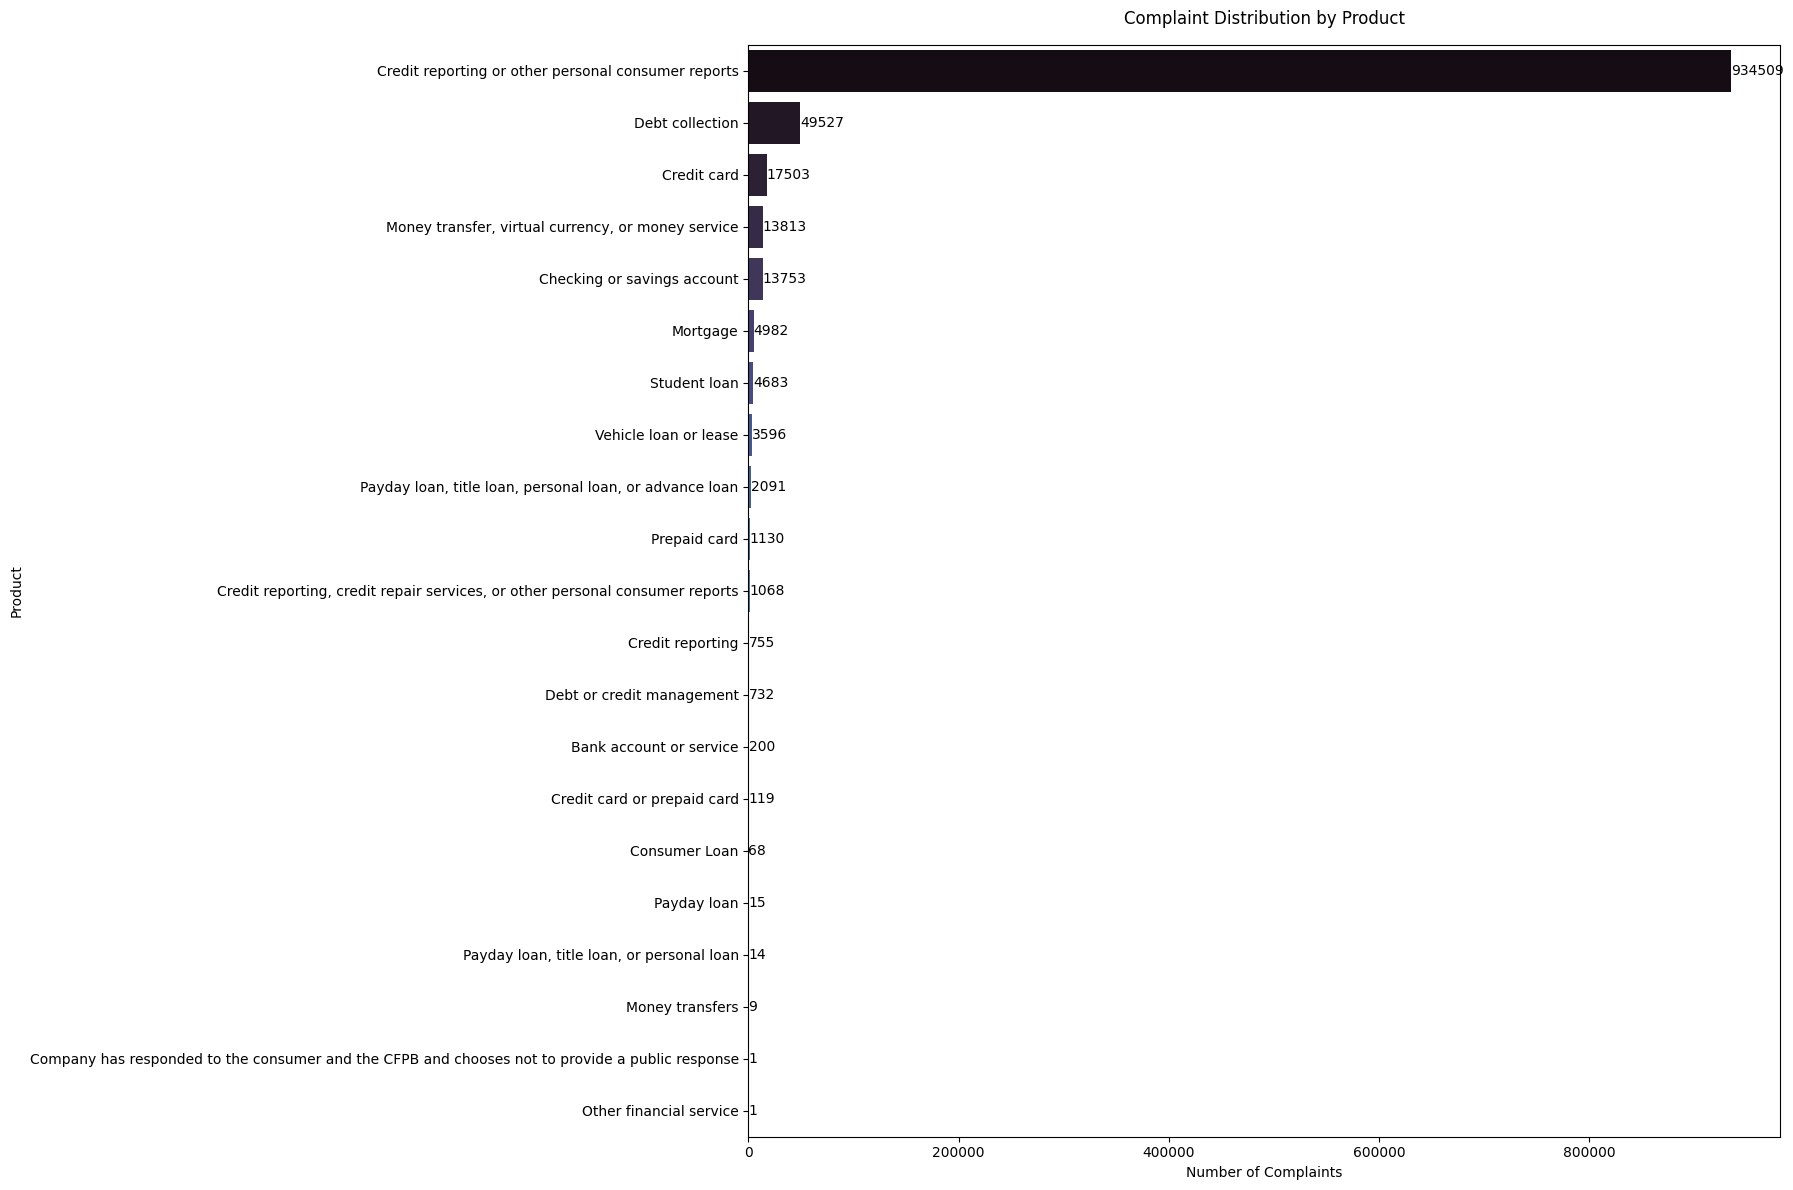

In [38]:
plt.figure(figsize=(18, 12))
product_counts = df['Product'].value_counts()
ax = sns.barplot(y=product_counts.index, x=product_counts.values, palette='mako')

# Add value labels at the end of each bar
for i, v in enumerate(product_counts.values):
    ax.text(v + 0.5, i, f'{v}', color='black', ha='left', va='center')

plt.title("Complaint Distribution by Product", pad=15)
plt.xlabel("Number of Complaints")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

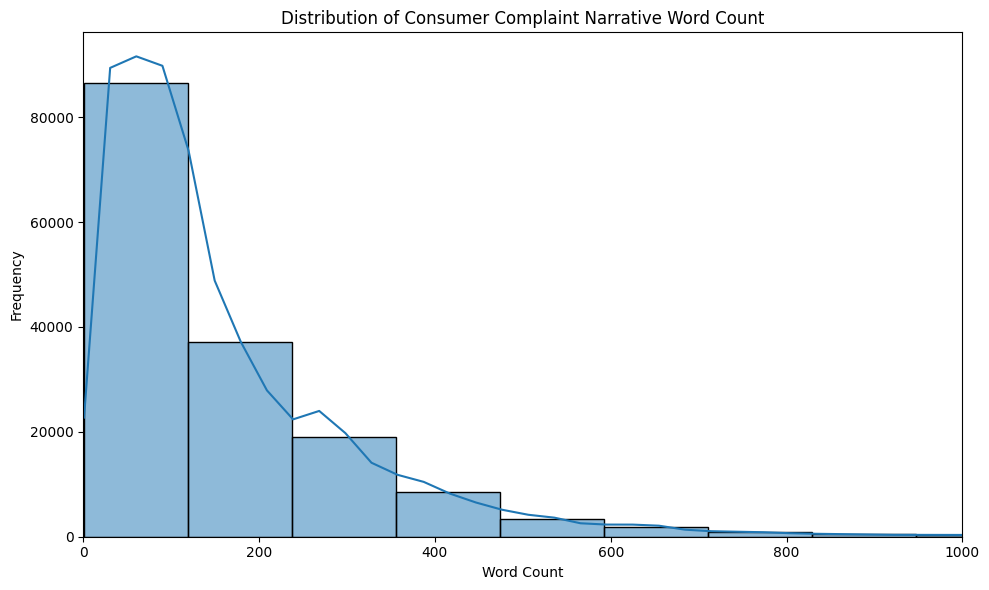

In [39]:
# Compute word count only for non-null narratives
df['narrative_word_count'] = df['Consumer complaint narrative'].dropna().apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(df['narrative_word_count'].dropna(), bins=50, kde=True)
plt.title("Distribution of Consumer Complaint Narrative Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()

In [40]:
print("\nNarrative Length Statistics:")
print(df['narrative_word_count'].describe())


Narrative Length Statistics:
count    159023.000000
mean        167.669884
std         191.926452
min           1.000000
25%          58.000000
50%         108.000000
75%         213.000000
max        5915.000000
Name: narrative_word_count, dtype: float64


In [44]:
with_narrative = df['Consumer complaint narrative'].notnull().sum()
without_narrative = df['Consumer complaint narrative'].isnull().sum()
print(f"\nComplaints with narrative: {with_narrative}")
print(f"Complaints without narrative: {without_narrative}")


Complaints with narrative: 159023
Complaints without narrative: 889552


### Filter Relevant Records

In [51]:
# Define the five target products
target_products = [
    "Credit card",
    "Personal loan",
    "Buy Now, Pay Later",
    "Savings account",
    "Money transfer"
]

# Filter the dataset
filtered_df = df[
    (df['Product'].isin(target_products)) &
    (df['Consumer complaint narrative'].notnull())
].copy()

In [63]:

filtered_df.shape

(5016, 19)

In [64]:
filtered_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_word_count
12237,6/13/2025,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,6/13/2025,Closed with non-monetary relief,Yes,NaN,14069121.0,91.0
13280,6/12/2025,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,6/13/2025,Closed with monetary relief,Yes,NaN,14047085.0,156.0
13506,6/12/2025,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,6/12/2025,Closed with explanation,Yes,NaN,14040217.0,233.0
13955,6/9/2025,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,6/9/2025,Closed with monetary relief,Yes,NaN,13968411.0,454.0
14249,6/9/2025,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,6/9/2025,Closed with monetary relief,Yes,NaN,13965746.0,170.0


In [61]:
filtered_df["Consumer complaint narrative"].isnull().sum()

np.int64(0)

In [54]:
filtered_df.to_csv('../data/processed/filtered_complaints.csv', index=False)

In [68]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\n|\r', ' ', text)  # Remove line breaks
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'i am writing to (file|submit) a complaint', '', text)  # Remove boilerplate
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text

filtered_df['cleaned_Consumer_complaint_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)

In [67]:
filtered_df.to_csv('../data/processed/filtered_complaints12.csv', index=False)